['Unnamed: 0', 'link', 'address', 'price', 'super_area', 'bedrooms',
       'bathroom', 'balcony', 'additional_rooms', 'age_possession', 'floor',
       'furnishing_type', 'facing', 'num_parking', 'features']

## Unnamed: 0 
-Drop

## address
- extract sector in seperate col

## price
- Cr , Price on Request , Lac, 
- Dtype - object -> float

## super_area
- make price/sq ft col

## bedrooms
- remove Bedrooms
- dtype -> int

## bathroom
- remove Bathrooms
- dtype -> int

## balcony
- replace No Balcony -> 0
- categorical

## additional_rooms
- nan,Others, Servant Room , Study Room, Store Room, Pooja Room

## age_possession
- ['1 to 5 Year Old', '5 to 10 Year Old', '0 to 1 Year Old',
       '10+ Year Old', 'Under Construction', 'Mar 2026', 'Dec 2028',
       'Dec 2025', 'Oct 2026', 'Jun 2031', 'Jan 2027', 'Dec 2027',
       'Dec 2026', 'Apr 2028', 'Feb 2027', 'Mar 2028', 'Jun 2025',
       'Within 3 months', 'Nov 2026', 'Jul 2030', 'Feb 2028',
       'Within 6 months', 'Apr 2027']

- make it categorical -> 1 to 5 Year Old', '5 to 10 Year Old', '0 to 1 Year Old',
       '10+ Year Old', 'Under Construction
- check details for underconstruction houses
- change all future dates to Under Construction

## floor
- extract floor number
- extract total floors -> can be made categorical?

## furnishing_type
- ['Semifurnished', nan, 'Unfurnished', 'Furnished']
- what to do with nan values?

## facing
- what to do with nan values

In [2538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

pd.set_option('display.max_columns', None) 

In [2539]:
df= pd.read_csv('dataset_raw.csv')

In [2540]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5605 non-null   int64  
 1   link              5605 non-null   object 
 2   address           5605 non-null   object 
 3   price             5605 non-null   object 
 4   super_area        5605 non-null   float64
 5   bedrooms          5605 non-null   object 
 6   bathroom          5605 non-null   object 
 7   balcony           5605 non-null   object 
 8   additional_rooms  3951 non-null   object 
 9   age_possession    5605 non-null   object 
 10  floor             5605 non-null   object 
 11  furnishing_type   5342 non-null   object 
 12  facing            4974 non-null   object 
 13  num_parking       5151 non-null   object 
 14  features          5569 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 657.0+ KB


In [2541]:
df.columns

Index(['Unnamed: 0', 'link', 'address', 'price', 'super_area', 'bedrooms',
       'bathroom', 'balcony', 'additional_rooms', 'age_possession', 'floor',
       'furnishing_type', 'facing', 'num_parking', 'features'],
      dtype='object')

In [2542]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

# address
- Extract apartment name
-Extract sector

In [2543]:
## address - extract sector in seperate col
sector = df['address'].str.split('\n').str[1].str.split(',').str[0].str.lower()

In [2544]:
sector

0           jharsa
1            sohna
2        sector 71
3        sector 82
4            sohna
           ...    
5600         sohna
5601     sector 99
5602     sector 92
5603     sector 65
5604    sector 70a
Name: address, Length: 5605, dtype: object

In [2545]:
sector.unique()

array(['jharsa', 'sohna', 'sector 71', 'sector 82', 'sector 89',
       'sector 86', 'sector 102', 'sector 37d', 'sector 68', 'sector 67',
       'sector 106', 'sector 63a', 'sector-33 sohna', 'sector 70',
       'sector 69', 'sector 65', 'sector 48', 'sector 37c', 'sector 81',
       'sector 95', 'sector 79', 'sector 88a', 'sector 95a', 'sector 93',
       'ardee city', 'sector 61', 'gwal pahari', 'sector 107',
       'sector 66', 'sector 92', 'sector 90', 'sector 83', 'sector 33',
       'sector 49', 'sector 14', 'sector 1a imt manesar', 'sector 54',
       'sector-2 sohna', 'sector 104', 'sector 84', 'sector 63',
       'sector 91', 'dlf phase 4', 'sector 76', 'sector 36 sohna',
       'dlf phase 5', 'sector 99', 'sector 77', 'sector 67a', 'sector 62',
       'sector 99a', 'malibu town', 'sector 105', 'golf course ext road',
       'sector 70a', 'sector 113', 'wazirabad', 'sector 108', 'sector 3',
       'nirvana country', 'old dlf colony', 'nawada fatehpur',
       'sector 109', 's

In [2546]:
df.insert(2,column= 'sector', value= sector)

In [2547]:
df[df['sector'].isna()]

,link,address,sector,price,super_area,bedrooms,bathroom,balcony,additional_rooms,age_possession,floor,furnishing_type,facing,num_parking,features


In [2548]:
df.insert(2,'apartment_name',df['address'].str.split('\n').str[0].str.lower())

## price
- Cr , Price on Request , Lac, 
- Dtype - object -> float

In [2549]:
#convert price to cr
def conv_price(price):
    if 'Cr' in price:
        return float(price.split()[0])
    if 'Lac' in price:
        return float(price.split()[0])/100
    else:
        return np.nan
    

In [2550]:
df['price'] = df['price'].apply(conv_price)

In [2551]:
df['price'] = df['price'].astype('float')

## super_area
- make price/sq ft col

In [2552]:
#count null values
df['super_area'].isna().sum()

price_sqft = round(df['price']*10000000/df['super_area'],1)
price_sqft.describe()

count      5603.000000
mean      14920.933482
std       16092.175019
min        2865.200000
25%        9913.250000
50%       12370.400000
75%       16198.450000
max      406051.700000
dtype: float64

In [2553]:
df.insert(5,'price_sqft', price_sqft)

In [2554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              5605 non-null   object 
 1   address           5605 non-null   object 
 2   apartment_name    5605 non-null   object 
 3   sector            5605 non-null   object 
 4   price             5603 non-null   float64
 5   price_sqft        5603 non-null   float64
 6   super_area        5605 non-null   float64
 7   bedrooms          5605 non-null   object 
 8   bathroom          5605 non-null   object 
 9   balcony           5605 non-null   object 
 10  additional_rooms  3951 non-null   object 
 11  age_possession    5605 non-null   object 
 12  floor             5605 non-null   object 
 13  furnishing_type   5342 non-null   object 
 14  facing            4974 non-null   object 
 15  num_parking       5151 non-null   object 
 16  features          5569 non-null   object 


## bedrooms
- remove Bedrooms
- dtype -> int

In [2555]:
df['bedrooms'].unique()

array(['2 Bedrooms', '4 Bedrooms', '3 Bedrooms', '1 Bedroom',
       '5 Bedrooms', '6 Bedrooms'], dtype=object)

In [2556]:
df['bedrooms']= df['bedrooms'].str.split().str[0]
df['bedrooms']= df['bedrooms'].astype('int')

## bathroom
- remove bathrooms
- dtype -> int

In [2557]:
df['bathroom']= df['bathroom'].str.split().str[0]

In [2558]:
df['bathroom'].value_counts().sort_index()

bathroom
1      61
2    1465
3    2092
4    1424
5     432
6     113
7      18
Name: count, dtype: int64

In [2559]:
df['bathroom'] = df['bathroom'].astype(int)

## balcony
- replace No Balcony -> 0
- categorical

In [2560]:
df['balcony'].unique()

array(['2 Balconies', '1 Balcony', '3 Balconies', 'No Balcony',
       '3+ Balconies'], dtype=object)

In [2561]:
df['balcony'] = df['balcony'].str.split().str[0]

In [2562]:
df['balcony'] = df['balcony'].apply(lambda x: 0 if x == 'No' else x)

In [2563]:
df['balcony'].value_counts()

balcony
3+    2094
3     1902
2     1215
1      376
0       18
Name: count, dtype: int64

## age_possession
- ['1 to 5 Year Old', '5 to 10 Year Old', '0 to 1 Year Old',
       '10+ Year Old', 'Under Construction', 'Mar 2026', 'Dec 2028',
       'Dec 2025', 'Oct 2026', 'Jun 2031', 'Jan 2027', 'Dec 2027',
       'Dec 2026', 'Apr 2028', 'Feb 2027', 'Mar 2028', 'Jun 2025',
       'Within 3 months', 'Nov 2026', 'Jul 2030', 'Feb 2028',
       'Within 6 months', 'Apr 2027']

- make it categorical -> 1 to 5 Year Old', '5 to 10 Year Old', '0 to 1 Year Old',
       '10+ Year Old', 'Under Construction
- check details for underconstruction houses
- change all future dates to Under Construction

In [2564]:
df['age_possession'].value_counts()

age_possession
1 to 5 Year Old     3206
0 to 1 Year Old     1000
5 to 10 Year Old     860
10+ Year Old         215
Within 6 months       35
                    ... 
May 2030               1
Jul 2026               1
Sep 2028               1
Oct 2027               1
Mar 2031               1
Name: count, Length: 63, dtype: int64

In [2565]:
df[~df['age_possession'].isin(['0 to 1 Year Old', '1 to 5 Year Old' , '5 to 10 Year Old' , '10+ Year Old'])]

,link,address,apartment_name,sector,price,price_sqft,super_area,bedrooms,bathroom,balcony,additional_rooms,age_possession,floor,furnishing_type,facing,num_parking,features
9,https://www.99acres.com/2-bhk-bedroom-apartmen...,"Pareena Mi Casa\nSector 68, Gurgaon",pareena mi casa,sector 68,0.99,11445.1,865.00,2,1,2,NaN,Within 3 months,23rd of 25 Floors,Unfurnished,East,"1 Covered, 1 Open","['Power Back-up', 'Feng Shui / Vaastu Complian..."
19,https://www.99acres.com/3-bhk-bedroom-apartmen...,"M3M Heights\nSector 65, Gurgaon",m3m heights,sector 65,2.80,14520.1,1928.36,3,3,0,NaN,Under Construction,37th of 47 Floors,Unfurnished,NaN,NaN,NaN
27,https://www.99acres.com/3-bhk-bedroom-apartmen...,"Signature Global City 79B\nSector 79, Gurgaon",signature global city 79b,sector 79,1.60,7364.4,2172.60,3,3,2,Store Room,Jun 2026,3rd of 4 Floors,Semifurnished,East,1 Covered,"['Security / Fire Alarm', 'Intercom Facility',..."
34,https://www.99acres.com/2-bhk-bedroom-apartmen...,"Smart World Orchard\nSector 61, Gurgaon",smart world orchard,sector 61,1.90,11946.7,1590.40,2,2,2,NaN,Within 3 months,1st of 4 Floors,NaN,NaN,1 Covered,"['Power Back-up', 'Lift(s)', 'Swimming Pool', ..."
44,https://www.99acres.com/2-bhk-bedroom-apartmen...,"Eldeco Accolade\nSohna, Gurgaon",eldeco accolade,sohna,1.35,9265.6,1457.00,2,2,3+,"Study Room,Others",Under Construction,8th of 19 Floors,NaN,South,1 Covered,"['Feng Shui / Vaastu Compliant', 'Intercom Fac..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,https://www.99acres.com/3-bhk-bedroom-apartmen...,"Laburnum Victory Floors\nSector 63A, Gurgaon",laburnum victory floors,sector 63a,2.30,9816.5,2343.00,3,3,2,Servant Room,Within 3 months,1st of 4 Floors,Semifurnished,East,2 Covered,"['Feng Shui / Vaastu Compliant', 'Intercom Fac..."
5052,https://www.99acres.com/3-bhk-bedroom-apartmen...,"DLF Gardencity Enclave\nSector 93, Gurgaon",dlf gardencity enclave,sector 93,1.75,10000.0,1750.00,3,3,2,"Pooja Room,Study Room,Servant Room",Within 6 months,4th of 4 Floors,Unfurnished,NaN,NaN,"['Shopping Centre', 'Club house / Community Ce..."
5056,https://www.99acres.com/3-bhk-bedroom-apartmen...,"M3M Golf Hills\nSector 79, Gurgaon",m3m golf hills,sector 79,2.75,14458.5,1902.00,3,3,3+,Study Room,Jan 2027,2nd of 30 Floors,Semifurnished,East,"1 Covered, 1 Open","['Security / Fire Alarm', 'Lift(s)', 'High Cei..."
5115,https://www.99acres.com/3-bhk-bedroom-apartmen...,"Godrej Nature Plus\nSector-33 Sohna, Gurgaon",godrej nature plus,sector-33 sohna,1.76,7960.4,2210.94,3,2,3,Study Room,Within 6 months,15th of 22 Floors,Unfurnished,East,"1 Covered, 1 Open","['Feng Shui / Vaastu Compliant', 'Security / F..."


In [2566]:
def age_conv(age):
    if age not in ['0 to 1 Year Old', '1 to 5 Year Old' , '5 to 10 Year Old' , '10+ Year Old']:
        return 'Under construction'
    return age

df['age_possession'] = df['age_possession'].apply(age_conv)

In [2567]:
df['age_possession'] = df['age_possession'].str.lower()

In [2568]:
df['age_possession'].value_counts()

age_possession
1 to 5 year old       3206
0 to 1 year old       1000
5 to 10 year old       860
under construction     324
10+ year old           215
Name: count, dtype: int64

## floor
- extract floor number
- extract total floors -> can be made categorical?

In [2569]:
df['floor'].unique()

array(['Ground of 4 Floors', '6th   of 13 Floors', '1st   of 14 Floors',
       '4th   of 4 Floors', '1st   of 4 Floors', '11st   of 14 Floors',
       '6th   of 14 Floors', '1st   of 19 Floors', '23rd   of 25 Floors',
       '12nd   of 15 Floors', '12nd   of 14 Floors', '8th   of 13 Floors',
       '18th   of 20 Floors', '2nd   of 2 Floors', '3rd   of 14 Floors',
       '12nd   of 13 Floors', '7th   of 11 Floors', '37th   of 47 Floors',
       '13rd   of 14 Floors', '11st   of 11 Floors', '5th   of 11 Floors',
       '6th   of 23 Floors', '7th   of 21 Floors', '3rd   of 4 Floors',
       '5th   of 14 Floors', '14th   of 15 Floors', '10th   of 24 Floors',
       '2nd   of 4 Floors', '3rd   of 21 Floors', '6th   of 34 Floors',
       '7th   of 17 Floors', '7th   of 14 Floors', '3rd   of 9 Floors',
       '8th   of 19 Floors', '6th   of 15 Floors', '5th   of 8 Floors',
       '12nd   of 16 Floors', '1st   of 5 Floors', '1st   of 11 Floors',
       '13rd   of 43 Floors', '9th   of 16 Floo

In [2570]:
#136,100,87,2850,52
def floor_num(floor):
   return  "".join(char for char in floor.split()[0] if char.isdigit())


In [2571]:
floor_num = df['floor'].apply(floor_num)
df.insert(13,'floor_num',floor_num)

In [2572]:
df['floor_num'].replace('',0,inplace=True)

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_93576/2070009872.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [2573]:
df['floor_num'] = df['floor_num'].astype('int')

In [2574]:
df[df['floor'].str.contains('Lower')]

,link,address,apartment_name,sector,price,price_sqft,super_area,bedrooms,bathroom,balcony,additional_rooms,age_possession,floor,floor_num,furnishing_type,facing,num_parking,features
194,https://www.99acres.com/3-bhk-bedroom-apartmen...,"Emperium Premio\nSector 37C, Gurgaon",emperium premio,sector 37c,1.95,10597.8,1840.0,3,3,3,NaN,under construction,Lower Ground of 18 Floors,0,NaN,East,1 Covered,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
494,https://www.99acres.com/3-bhk-bedroom-apartmen...,"Emaar Gurgaon Greens\nSector 102, Gurgaon",emaar gurgaon greens,sector 102,2.10,12727.3,1650.0,3,3,3,Servant Room,1 to 5 year old,Lower Ground of 14 Floors,0,NaN,East,1 Covered,"['Feng Shui / Vaastu Compliant', 'Security / F..."


In [2575]:
def total_floors(floor):
    return "".join(char for char in floor.split(maxsplit =1 )[1] if char.isdigit())


In [2576]:
'10th   of 25 Floors'.split(maxsplit=1)

['10th', 'of 25 Floors']

In [2577]:
total_floor = df['floor'].apply(total_floors)
df.insert(14,'total_floors',total_floor)

In [2578]:
df['total_floors']= df['total_floors'].astype('int')

In [2579]:
df['total_floors'].value_counts(ascending=False).sort_index()

total_floors
0       2
1       4
2      35
3      58
4     254
5      43
6      11
7      22
8      42
9      27
10     73
11     99
12    209
13    219
14    832
15    132
16    107
17    207
18    267
19    474
20    207
21    193
22    172
23     55
24    271
25    111
26    230
27    137
28     68
29    192
30    114
31     23
32    122
33     53
34    179
35     63
36     17
38      6
39     44
40    124
41      5
42     29
43      4
45      3
47     30
48     18
51     18
Name: count, dtype: int64

In [2580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              5605 non-null   object 
 1   address           5605 non-null   object 
 2   apartment_name    5605 non-null   object 
 3   sector            5605 non-null   object 
 4   price             5603 non-null   float64
 5   price_sqft        5603 non-null   float64
 6   super_area        5605 non-null   float64
 7   bedrooms          5605 non-null   int64  
 8   bathroom          5605 non-null   int64  
 9   balcony           5605 non-null   object 
 10  additional_rooms  3951 non-null   object 
 11  age_possession    5605 non-null   object 
 12  floor             5605 non-null   object 
 13  floor_num         5605 non-null   int64  
 14  total_floors      5605 non-null   int64  
 15  furnishing_type   5342 non-null   object 
 16  facing            4974 non-null   object 


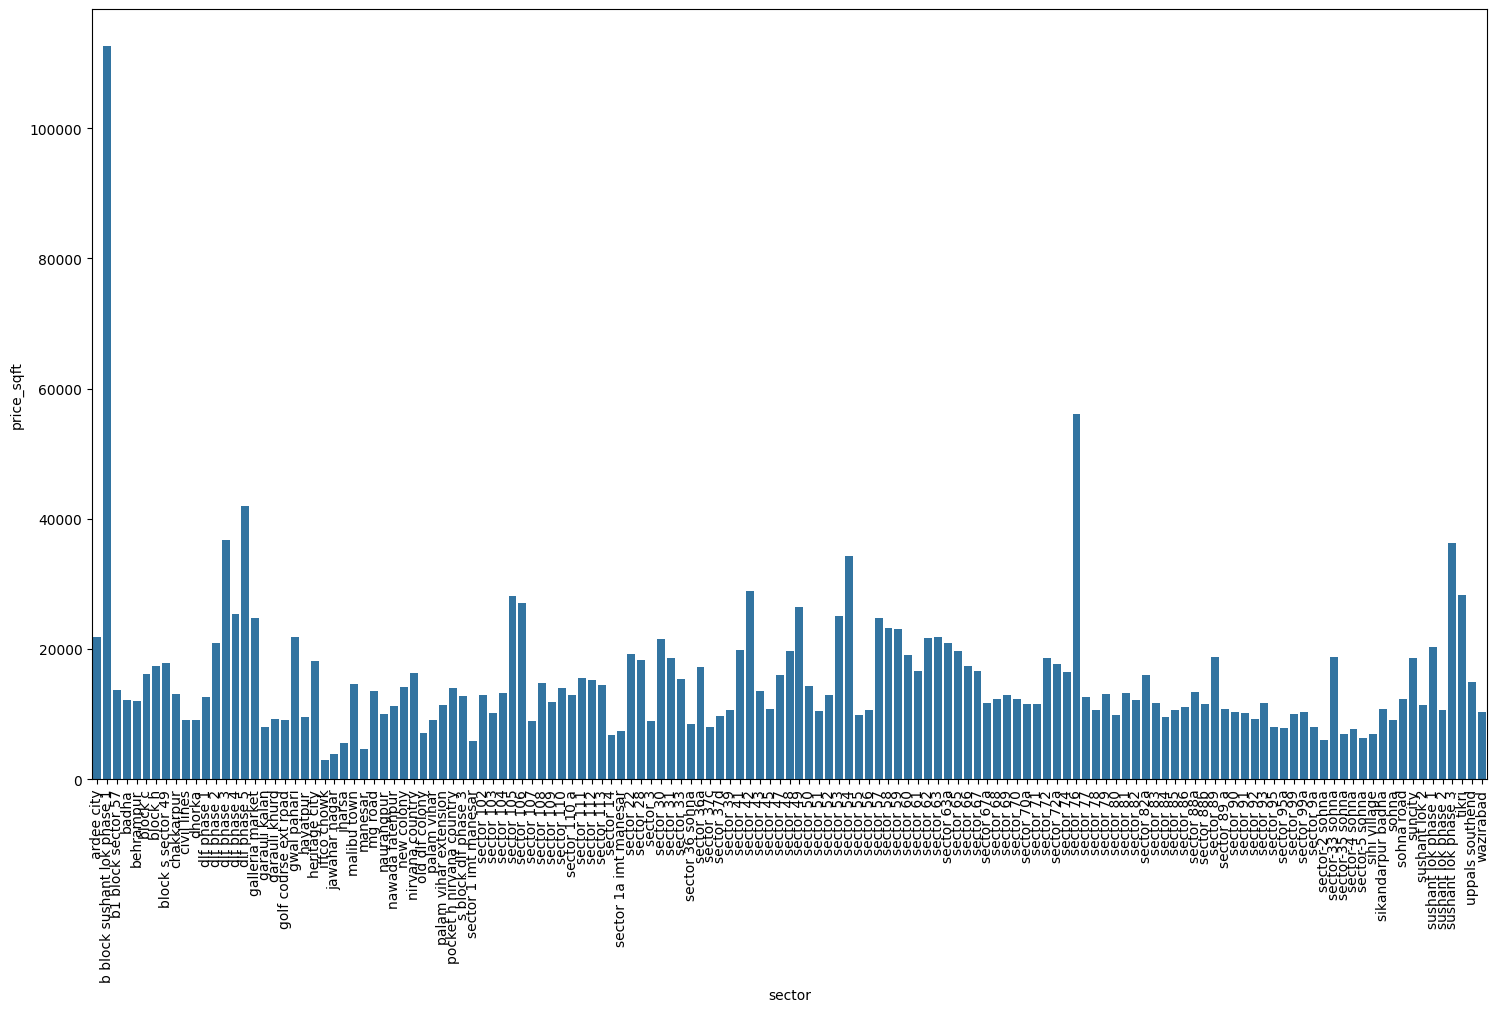

In [2581]:
temp = df.groupby('sector')['price_sqft'].mean().sort_index()
figsize = plt.figure(figsize= (18,10))
sns.barplot(data = temp)
plt.xticks(rotation=90)
plt.show()

In [2582]:
temp_df = temp.reset_index()
temp_df['sector'] = temp_df['sector'].astype(str)

In [2583]:
temp_df.sort_values(by = 'price_sqft', ascending=False)

,sector,price_sqft
1,b block sushant lok phase 1,112676.100000
99,sector 76,56040.560870
15,dlf phase 5,41932.448485
13,dlf phase 3,36713.520000
137,sushant lok phase 3,36312.066667
...,...,...
38,sector 1 imt manesar,5807.587500
25,jharsa,5477.300000
27,manesar,4551.000000
24,jawahar nagar,3814.600000


In [2584]:
fig = ex.bar(data_frame= temp_df ,x = 'sector', y= 'price_sqft')
# fig.update_layout(width=1400)

# fig = px.bar(df, x='x_col', y='y_col')  # replace with actual column names



fig.update_layout(
    xaxis=dict(
        tickmode='array',   # ← forces manual tick control
        tickvals=list(range(len(temp_df['sector']))),   # ← positions (indexes of bars)
        ticktext=df['sector'].tolist(), # ← labels to show at those positions
        tickangle=-45
    ),
    width=2000,
    height = 500
)
fig.show()

In [2585]:
df[df['sector']=='Sector 92']['price_sqft'].sort_values(ascending=False)

Series([], Name: price_sqft, dtype: float64)

# addtional rooms
nan,Others, Servant Room , Study Room, Store Room, Pooja Room

In [2586]:
def additional_room(room):
    if pd.isna(room):
        return [0,0,0,0]
    rooms = []
    rooms.append(1) if 'Servant Room' in room else rooms.append(0)
    rooms.append(1) if 'Study Room' in room else rooms.append(0)
    rooms.append(1) if 'Pooja Room' in room else rooms.append(0)
    rooms.append(1) if 'Store Room' in room else rooms.append(0)
    return rooms


In [2587]:
df[['servant_room','study_room','pooja_room','store_room']] = df['additional_rooms'].astype(str).apply(additional_room).apply(pd.Series).astype('int')

In [2588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              5605 non-null   object 
 1   address           5605 non-null   object 
 2   apartment_name    5605 non-null   object 
 3   sector            5605 non-null   object 
 4   price             5603 non-null   float64
 5   price_sqft        5603 non-null   float64
 6   super_area        5605 non-null   float64
 7   bedrooms          5605 non-null   int64  
 8   bathroom          5605 non-null   int64  
 9   balcony           5605 non-null   object 
 10  additional_rooms  3951 non-null   object 
 11  age_possession    5605 non-null   object 
 12  floor             5605 non-null   object 
 13  floor_num         5605 non-null   int64  
 14  total_floors      5605 non-null   int64  
 15  furnishing_type   5342 non-null   object 
 16  facing            4974 non-null   object 


# features
'Centrally Air Conditioned','Club house / Community Center','False Ceiling Lighting','Feng Shui / Vaastu Compliant','Fitness Centre / GYM','High Ceiling Height','Intercom Facility','Internet/wi-fi connectivity','Lift(s)','Low Density Society','Maintenance Staff','Natural Light','No open drainage around','Park','Piped-gas','Power Back-up','Private Garden / Terrace','Rain Water Harvesting','Recently Renovated','Security / Fire Alarm','Security Personnel','Separate entry for servant room','Shopping Centre','Spacious Interiors','Swimming Pool','Visitor Parking','Waste Disposal','Water Storage','Water purifier','Water softening plant'

In [2589]:
features = df['features'].str.replace('\'' , '').str.split(',').to_list()
feature_set = set()

for item in features:
    if isinstance(item,list):
        for feature in item:
            feature_set.add(feature.strip().strip('[]'))


In [2590]:
feature_set

{'Airy Rooms',
 'Bank Attached Property',
 'Centrally Air Conditioned',
 'Club house / Community Center',
 'False Ceiling Lighting',
 'Feng Shui / Vaastu Compliant',
 'Fitness Centre / GYM',
 'High Ceiling Height',
 'Intercom Facility',
 'Internet/wi-fi connectivity',
 'Lift(s)',
 'Low Density Society',
 'Maintenance Staff',
 'Natural Light',
 'No open drainage around',
 'Park',
 'Piped-gas',
 'Power Back-up',
 'Private Garden / Terrace',
 'Rain Water Harvesting',
 'Recently Renovated',
 'Security / Fire Alarm',
 'Security Personnel',
 'Separate entry for servant room',
 'Shopping Centre',
 'Spacious Interiors',
 'Swimming Pool',
 'Visitor Parking',
 'Waste Disposal',
 'Water Storage',
 'Water purifier',
 'Water softening plant'}

Here's a suggested **luxury score for each feature**, based on general desirability in premium housing projects in **Gurugram, India**, taking into account lifestyle, exclusivity, utility, and frequency of appearance in luxury listings.

---

### ✅ **Luxury Score Mapping (Scale: 1 to 5)**

| Feature                                | Score | Rationale |
|----------------------------------------|:-----:|-----------|
| **Swimming Pool**                      | 5     | High-end amenity, luxury lifestyle |
| **Centrally Air Conditioned**          | 5     | Premium comfort feature, rare |
| **Private Garden / Terrace**          | 5     | Exclusive, highly desirable |
| **Fitness Centre / GYM**              | 4     | Health-oriented, expected in modern societies |
| **Club house / Community Center**     | 4     | Social + recreational value |
| **Water softening plant**             | 4     | High utility, common in luxury high-rises |
| **Piped-gas**                         | 3     | Practical but still desirable |
| **Power Back-up**                     | 3     | Essential, expected in mid- to high-tier housing |
| **Lift(s)**                           | 3     | Standard in multi-story buildings |
| **Visitor Parking**                   | 3     | Convenience & good planning |
| **Intercom Facility**                 | 3     | Basic security expectation |
| **Security Personnel**                | 3     | Mid-level security measure |
| **Security / Fire Alarm**             | 3     | Expected in gated communities |
| **Maintenance Staff**                 | 2     | Functional necessity |
| **Shopping Centre**                   | 2     | Added convenience |
| **Park**                              | 2     | Aesthetic & family-friendly |
| **Rain Water Harvesting**             | 2     | Sustainability score, common in modern buildings |
| **Water Storage**                     | 2     | Basic necessity |
| **Feng Shui / Vaastu Compliant**      | 2     | Popular among Indian buyers |
| **Natural Light**                     | 1     | Important but common |
| **Airy Rooms**                        | 1     | Design-related; not exclusive |
| **Spacious Interiors**                | 1     | Expected in most quality homes |
| **High Ceiling Height**               | 1     | Aesthetic but not always functional |
| **Waste Disposal**                    | 1     | Functional necessity |
| **Water purifier**                    | 1     | Standard feature |
| **Separate entry for servant room**   | 1     | Not luxury-specific, but functional |
| **No open drainage around**           | 1     | Hygiene-related, should be standard |
| **Low Density Society**               | 1     | Marketed as luxury, but subjective |
| **False Ceiling Lighting**            | 1     | Design-focused |
| **Recently Renovated**                | 1     | Good to have, not luxury in itself |
| **Bank Attached Property**            | 0     | Financial tag, not a luxury feature |

---

### 🧠 How the Scores Were Decided:
- **5:** Rare, high-end exclusivity
- **4:** Common in luxury housing but not exclusive
- **3:** Valuable, but mid-range expectations
- **2:** Functional or moderately useful
- **1:** Basic design/utility; expected
- **0:** Neutral or unrelated to luxury


In [2591]:
# Define luxury score mapping
luxury_scores = {
    'Swimming Pool': 5,
    'Centrally Air Conditioned': 5,
    'Private Garden / Terrace': 5,
    'Fitness Centre / GYM': 4,
    'Club house / Community Center': 4,
    'Water softening plant': 4,
    'Piped-gas': 3,
    'Power Back-up': 3,
    'Lift(s)': 3,
    'Visitor Parking': 3,
    'Intercom Facility': 3,
    'Security Personnel': 3,
    'Security / Fire Alarm': 3,
    'Maintenance Staff': 2,
    'Shopping Centre': 2,
    'Park': 2,
    'Rain Water Harvesting': 2,
    'Water Storage': 2,
    'Feng Shui / Vaastu Compliant': 2,
    'Natural Light': 1,
    'Airy Rooms': 1,
    'Spacious Interiors': 1,
    'High Ceiling Height': 1,
    'Waste Disposal': 1,
    'Water purifier': 1,
    'Separate entry for servant room': 1,
    'No open drainage around': 1,
    'Low Density Society': 1,
    'False Ceiling Lighting': 1,
    'Recently Renovated': 1,
    'Bank Attached Property': 0
}

# Function to compute luxury score
def compute_luxury_score(features):
    if pd.isna(features):
        return 0
    features = features.replace("'", "").strip("[]").split(',')
    score = sum(luxury_scores.get(f.strip(), 0) for f in features)
    return score

# Apply the function
df['luxury_score'] = df['features'].apply(compute_luxury_score).astype('int')

# Categorize into luxury tiers
def categorize_luxury(score):
    if score >= 20:
        return 'High'
    elif score >= 10:
        return 'Medium'
    else:
        return 'Low'

df['luxury_category'] = df['luxury_score'].apply(categorize_luxury).str.lower()



In [2592]:
df

,link,address,apartment_name,sector,price,price_sqft,super_area,bedrooms,bathroom,balcony,additional_rooms,age_possession,floor,floor_num,total_floors,furnishing_type,facing,num_parking,features,servant_room,study_room,pooja_room,store_room,luxury_score,luxury_category
0,https://www.99acres.com/2-bhk-bedroom-apartmen...,"Bharat Residency\nJharsa, Gurgaon",bharat residency,jharsa,0.70,5477.3,1278.0000,2,2,2,Store Room,1 to 5 year old,Ground of 4 Floors,0,4,Semifurnished,NaN,1 Open,"['Security / Fire Alarm', 'Lift(s)', 'High Cei...",0,0,0,1,21,high
1,https://www.99acres.com/2-bhk-bedroom-apartmen...,"GLS Arawali Homes\nSohna, Gurgaon",gls arawali homes,sohna,0.38,5569.0,682.3526,2,2,2,Others,1 to 5 year old,6th of 13 Floors,6,13,Semifurnished,East,"1 Covered, 1 Open","['Security / Fire Alarm', 'Power Back-up', 'Fe...",0,0,0,0,35,high
2,https://www.99acres.com/2-bhk-bedroom-apartmen...,"CHD Avenue 71\nSector 71, Gurgaon",chd avenue 71,sector 71,1.35,11268.8,1198.0000,2,2,2,NaN,10+ year old,1st of 14 Floors,1,14,Unfurnished,North,1 Covered,"['Centrally Air Conditioned', 'Water purifier'...",0,0,0,0,71,high
3,https://www.99acres.com/4-bhk-bedroom-apartmen...,"signature avenue\nSector 82, Gurgaon",signature avenue,sector 82,3.40,94444.4,360.0000,4,4,2,"Pooja Room,Servant Room",0 to 1 year old,4th of 4 Floors,4,4,Furnished,North-East,2 Covered,"['Power Back-up', 'Lift(s)', 'Water purifier',...",1,0,1,0,28,high
4,https://www.99acres.com/2-bhk-bedroom-apartmen...,"Signature Global Park\nSohna, Gurgaon",signature global park,sohna,0.95,8920.2,1065.0000,2,2,2,NaN,0 to 1 year old,1st of 4 Floors,1,4,Semifurnished,NaN,1 Covered,"['Lift(s)', 'Swimming Pool', 'Park', 'Fitness ...",0,0,0,0,18,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,https://www.99acres.com/4-bhk-bedroom-apartmen...,"MVN Athens\nSohna, Gurgaon",mvn athens,sohna,0.88,6699.7,1313.5000,4,4,2,NaN,5 to 10 year old,11st of 14 Floors,11,14,Semifurnished,North,2 Open,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",0,0,0,0,26,high
5601,https://www.99acres.com/4-bhk-bedroom-apartmen...,"Pareena Express Heights\nSector 99, Gurgaon",pareena express heights,sector 99,3.75,10714.3,3500.0000,4,4,3+,"Servant Room,Study Room",1 to 5 year old,14th of 14 Floors,14,14,Unfurnished,North-East,2 Covered,"['Water purifier', 'Centrally Air Conditioned'...",1,1,0,0,64,high
5602,https://www.99acres.com/3-bhk-bedroom-apartmen...,"Sare Homes\nSector 92, Gurgaon",sare homes,sector 92,1.45,8906.6,1628.0000,3,4,3+,Servant Room,1 to 5 year old,11st of 19 Floors,11,19,Semifurnished,South-East,1 Covered,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",1,0,0,0,49,high
5603,https://www.99acres.com/3-bhk-bedroom-apartmen...,"M3M Heights\nSector 65, Gurgaon",m3m heights,sector 65,3.85,13199.9,2916.6800,3,3,2,NaN,0 to 1 year old,22nd of 34 Floors,22,34,Semifurnished,North,NaN,"['Power Back-up', 'Security / Fire Alarm', 'In...",0,0,0,0,36,high


In [2593]:
df['num_parking'].unique()

array(['1 Open', '1 Covered, 1 Open', '1 Covered', '2 Covered', nan,
       '1 Covered, 2 Open', '2 Open', '2 Covered, 1 Open', '3 Covered',
       '2 Covered, 2 Open', '0 Covered, 1 Open', '2 Covered, 0 Open',
       '2 Covered, 3 Open', '3 Covered, 1 Open', '1 Covered, 3 Open',
       'Covered, 1 Open', '3 Covered, 2 Open', '1 Covered, 4 Open',
       'Covered, Open', '1 Covered, Open', '4 Covered',
       '3 Covered, 4 Open', '3 Covered, 3 Open', '3 Open',
       '1 Covered, 0 Open', '2 Covered, Open'], dtype=object)

In [2594]:
import pandas as pd
import numpy as np
import re

def extract_parking(parking_str):
    if pd.isna(parking_str):
        return 0  # covered, open
    
    covered = 0
    open_ = 0

    # Split on comma
    parts = [p.strip() for p in parking_str.split(',')]
    
    for part in parts:
        if 'Covered' in part:
            match = re.search(r'(\d+)', part)
            covered += int(match.group(1)) if match else 1
        elif 'Open' in part:
            match = re.search(r'(\d+)', part)
            open_ += int(match.group(1)) if match else 1

    return covered+open_

df['parking'] = df['num_parking'].apply(extract_parking).astype('int')


In [2595]:
df[['num_parking','parking']].sample(10)

,num_parking,parking
1704,1 Covered,1
4792,1 Open,1
5478,2 Covered,2
2663,1 Covered,1
5591,"1 Covered, 1 Open",2
3813,1 Open,1
167,"1 Covered, 1 Open",2
1239,NaN,0
2049,2 Covered,2
3044,"1 Covered, 1 Open",2


In [2596]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              5605 non-null   object 
 1   address           5605 non-null   object 
 2   apartment_name    5605 non-null   object 
 3   sector            5605 non-null   object 
 4   price             5603 non-null   float64
 5   price_sqft        5603 non-null   float64
 6   super_area        5605 non-null   float64
 7   bedrooms          5605 non-null   int64  
 8   bathroom          5605 non-null   int64  
 9   balcony           5605 non-null   object 
 10  additional_rooms  3951 non-null   object 
 11  age_possession    5605 non-null   object 
 12  floor             5605 non-null   object 
 13  floor_num         5605 non-null   int64  
 14  total_floors      5605 non-null   int64  
 15  furnishing_type   5342 non-null   object 
 16  facing            4974 non-null   object 


# cleaning null/missing values

In [2597]:
#price
df.drop(index = df[df['price'].isna()].index,inplace=True)

In [2598]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5603 entries, 0 to 5604
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              5603 non-null   object 
 1   address           5603 non-null   object 
 2   apartment_name    5603 non-null   object 
 3   sector            5603 non-null   object 
 4   price             5603 non-null   float64
 5   price_sqft        5603 non-null   float64
 6   super_area        5603 non-null   float64
 7   bedrooms          5603 non-null   int64  
 8   bathroom          5603 non-null   int64  
 9   balcony           5603 non-null   object 
 10  additional_rooms  3949 non-null   object 
 11  age_possession    5603 non-null   object 
 12  floor             5603 non-null   object 
 13  floor_num         5603 non-null   int64  
 14  total_floors      5603 non-null   int64  
 15  furnishing_type   5340 non-null   object 
 16  facing            4973 non-null   object 
 17  

In [2599]:
#furnishing_type -> still nan values remain
df['furnishing_type'].isna().sum()

263

In [2600]:
df.furnishing_type.unique()

array(['Semifurnished', 'Unfurnished', 'Furnished', nan], dtype=object)

In [2601]:
df.loc[
    (df['furnishing_type'].isna()) & (df['age_possession'] == 'Under construction'),
    'furnishing_type'
] = 'Unfurnished'

In [2602]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5603 entries, 0 to 5604
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              5603 non-null   object 
 1   address           5603 non-null   object 
 2   apartment_name    5603 non-null   object 
 3   sector            5603 non-null   object 
 4   price             5603 non-null   float64
 5   price_sqft        5603 non-null   float64
 6   super_area        5603 non-null   float64
 7   bedrooms          5603 non-null   int64  
 8   bathroom          5603 non-null   int64  
 9   balcony           5603 non-null   object 
 10  additional_rooms  3949 non-null   object 
 11  age_possession    5603 non-null   object 
 12  floor             5603 non-null   object 
 13  floor_num         5603 non-null   int64  
 14  total_floors      5603 non-null   int64  
 15  furnishing_type   5340 non-null   object 
 16  facing            4973 non-null   object 
 17  

In [2603]:
#filling luxury score,luxury category col

In [2604]:
df[df['features'].isna()].shape

(36, 26)

In [2605]:
df[df['features'].isna()]

,link,address,apartment_name,sector,price,price_sqft,super_area,bedrooms,bathroom,balcony,additional_rooms,age_possession,floor,floor_num,total_floors,furnishing_type,facing,num_parking,features,servant_room,study_room,pooja_room,store_room,luxury_score,luxury_category,parking
19,https://www.99acres.com/3-bhk-bedroom-apartmen...,"M3M Heights\nSector 65, Gurgaon",m3m heights,sector 65,2.80,14520.1,1928.36,3,3,0,NaN,under construction,37th of 47 Floors,37,47,Unfurnished,NaN,NaN,NaN,0,0,0,0,0,low,0
52,https://www.99acres.com/3-bhk-bedroom-apartmen...,"Unitech The Residences\nSector 33, Gurgaon",unitech the residences,sector 33,3.00,19108.3,1570.00,3,3,3,NaN,1 to 5 year old,1st of 11 Floors,1,11,NaN,NaN,NaN,NaN,0,0,0,0,0,low,0
179,https://www.99acres.com/2-bhk-bedroom-apartmen...,"Signature Global Park\nSohna, Gurgaon",signature global park,sohna,0.67,11492.3,583.00,2,2,2,NaN,1 to 5 year old,5th of 14 Floors,5,14,NaN,NaN,NaN,NaN,0,0,0,0,0,low,0
484,https://www.99acres.com/3-bhk-bedroom-apartmen...,"Conscient Elevate\nSector 59, Gurgaon",conscient elevate,sector 59,6.50,17639.6,3684.90,3,5,3,NaN,under construction,4th of 33 Floors,4,33,NaN,NaN,NaN,NaN,0,0,0,0,0,low,0
491,https://www.99acres.com/2-bhk-bedroom-apartmen...,"Signature Global Solera 2\nSector 107, Gurgaon",signature global solera 2,sector 107,0.70,8620.7,812.00,2,2,2,NaN,1 to 5 year old,6th of 12 Floors,6,12,NaN,NaN,NaN,NaN,0,0,0,0,0,low,0
501,https://www.99acres.com/3-bhk-bedroom-apartmen...,"Emaar Palm Gardens\nSector 84, Gurgaon",emaar palm gardens,sector 84,2.80,14736.8,1900.00,3,4,0,NaN,1 to 5 year old,9th of 17 Floors,9,17,NaN,NaN,NaN,NaN,0,0,0,0,0,low,0
505,https://www.99acres.com/3-bhk-bedroom-apartmen...,"Sare Green ParC 4\nSector 92, Gurgaon",sare green parc 4,sector 92,1.50,11312.2,1326.00,3,2,2,NaN,0 to 1 year old,4th of 22 Floors,4,22,Semifurnished,NaN,1 Covered,NaN,0,0,0,0,0,low,1
517,https://www.99acres.com/3-bhk-bedroom-apartmen...,"Emaar Palm Gardens\nSector 83, Gurgaon",emaar palm gardens,sector 83,2.80,14736.8,1900.00,3,3,0,NaN,1 to 5 year old,9th of 17 Floors,9,17,NaN,NaN,NaN,NaN,0,0,0,0,0,low,0
585,https://www.99acres.com/3-bhk-bedroom-apartmen...,"Orris Aster Court Premier\nSector 85, Gurgaon",orris aster court premier,sector 85,1.45,9206.3,1575.00,3,3,0,NaN,1 to 5 year old,5th of 12 Floors,5,12,Furnished,NaN,NaN,NaN,0,0,0,0,0,low,0
1015,https://www.99acres.com/4-bhk-bedroom-apartmen...,"Emaar MGF The Vilas\nDLF Phase 2, Gurgaon",emaar mgf the vilas,dlf phase 2,11.50,29487.2,3900.00,4,4,3,Servant Room,5 to 10 year old,5th of 10 Floors,5,10,Semifurnished,NaN,3 Covered,NaN,1,0,0,0,0,low,3


In [2606]:
apt_names = df[df['features'].isna()]['apartment_name'].unique()

In [2607]:
apt_luxury_score = df.groupby('apartment_name')['luxury_score'].mean().astype(int)

def fill_luxury_score(row):
    if pd.isna(row['features']):
        row['luxury_score'] = apt_luxury_score[row['apartment_name']]
        return row
    return row

df = df.apply(fill_luxury_score,axis =1)

def categorize_luxury(score):
    if score >= 20:
        return 'High'
    elif score >= 10:
        return 'Medium'
    else:
        return 'Low'

df['luxury_category'] = df['luxury_score'].apply(categorize_luxury).str.lower()

In [2620]:
#drop remaining rows
df.drop(df[(df['features'].isna())& (df['luxury_score']==0)].index, inplace=True)

In [2634]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5593 entries, 0 to 5604
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              5593 non-null   object 
 1   address           5593 non-null   object 
 2   apartment_name    5593 non-null   object 
 3   sector            5593 non-null   object 
 4   price             5593 non-null   float64
 5   price_sqft        5593 non-null   float64
 6   super_area        5593 non-null   float64
 7   bedrooms          5593 non-null   int64  
 8   bathroom          5593 non-null   int64  
 9   balcony           5593 non-null   object 
 10  additional_rooms  3946 non-null   object 
 11  age_possession    5593 non-null   object 
 12  floor             5593 non-null   object 
 13  floor_num         5593 non-null   int64  
 14  total_floors      5593 non-null   int64  
 15  furnishing_type   5330 non-null   object 
 16  facing            5593 non-null   object 
 17  

In [2633]:
#facing
df['facing'].fillna('na',inplace = True)

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_93576/789127392.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [2630]:
#parking
apt_names = df[(df['parking']==0) & (df['num_parking'].isna())]['apartment_name']
temp_df = df[df['apartment_name'].isin(apt_names)][['apartment_name','price','bedrooms','num_parking','parking']].sort_values(['apartment_name','bedrooms','price'])
temp_df.to_csv('temp.csv')

In [2636]:
df.drop(columns = ['link','address','additional_rooms','floor', 'num_parking','features'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5593 entries, 0 to 5604
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   apartment_name   5593 non-null   object 
 1   sector           5593 non-null   object 
 2   price            5593 non-null   float64
 3   price_sqft       5593 non-null   float64
 4   super_area       5593 non-null   float64
 5   bedrooms         5593 non-null   int64  
 6   bathroom         5593 non-null   int64  
 7   balcony          5593 non-null   object 
 8   age_possession   5593 non-null   object 
 9   floor_num        5593 non-null   int64  
 10  total_floors     5593 non-null   int64  
 11  furnishing_type  5330 non-null   object 
 12  facing           5593 non-null   object 
 13  servant_room     5593 non-null   int64  
 14  study_room       5593 non-null   int64  
 15  pooja_room       5593 non-null   int64  
 16  store_room       5593 non-null   int64  
 17  luxury_score     55